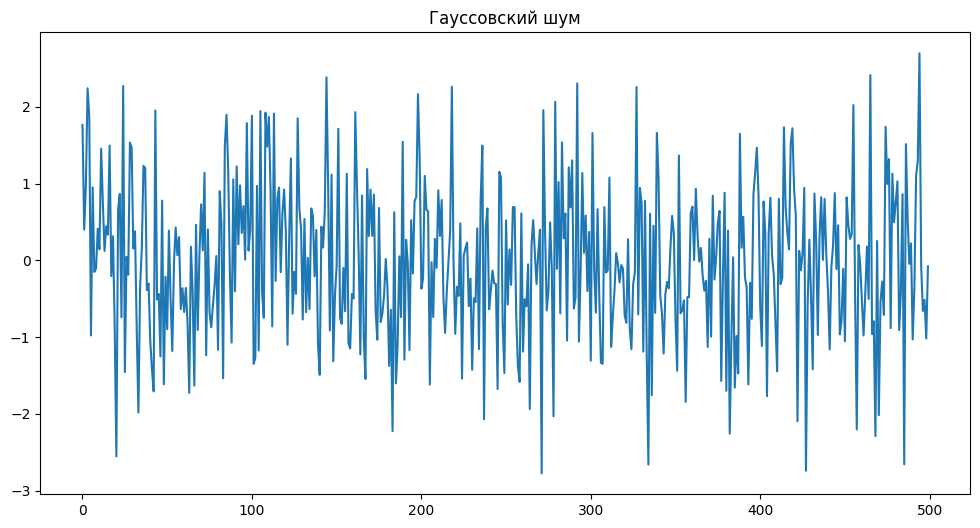

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Генерация гауссовского шума
np.random.seed(0)
gau =np.random.normal(0, 1, 500)

plt.figure(figsize=(12, 6))
plt.plot(gau, label='Гауссовский шум')
plt.title('Гауссовский шум')
plt.show()


In [5]:
result = adfuller(gau, maxlag=1, regression='ct')
p_value = result[1]
print(f'p-value: {p_value}')
if p_value < 0.05:
    print('Ряд стационарен')

p-value: 0.0
Ряд стационарен


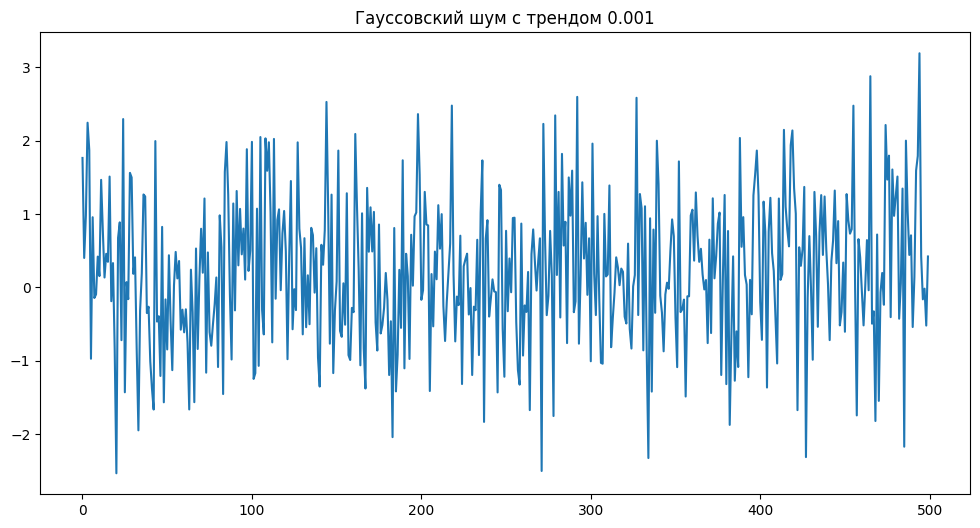

p-value (Гауссовский шум с трендом 0.001): 0.0
Ряд стационарен


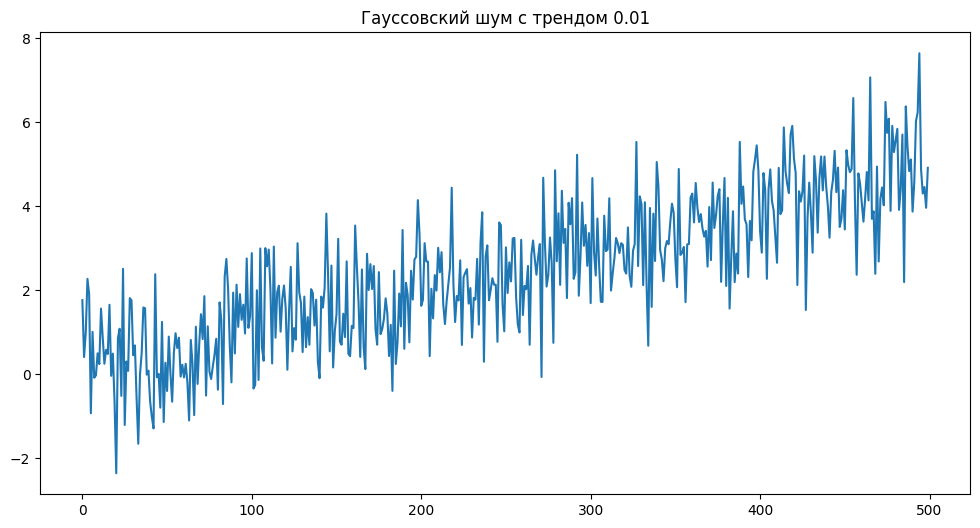

p-value (Гауссовский шум с трендом 0.01): 0.0
Ряд стационарен


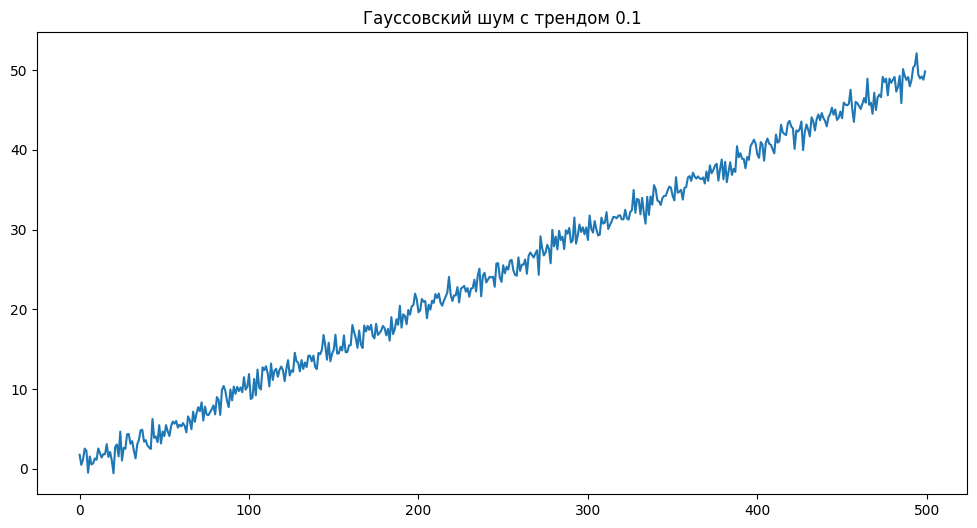

p-value (Гауссовский шум с трендом 0.1): 0.0
Ряд стационарен


In [7]:
trends = [0.001, 0.01, 0.1]
for trend in trends:
    series_with_trend = gau + trend * np.arange(500)

    # Построение графика гауссовского шума с трендом
    plt.figure(figsize=(12, 6))
    plt.plot(series_with_trend, label=f'Гауссовский шум с трендом {trend}')
    plt.title(f'Гауссовский шум с трендом {trend}')
    plt.show()

    # Проведение теста Дики-Фуллера на гауссовском шуме с трендом
    result = adfuller(series_with_trend, maxlag=1, regression='ct')
    p_value = result[1]
    print(f'p-value {trend}: {p_value}')
    if p_value < 0.05:
        print('Ряд стационарен')

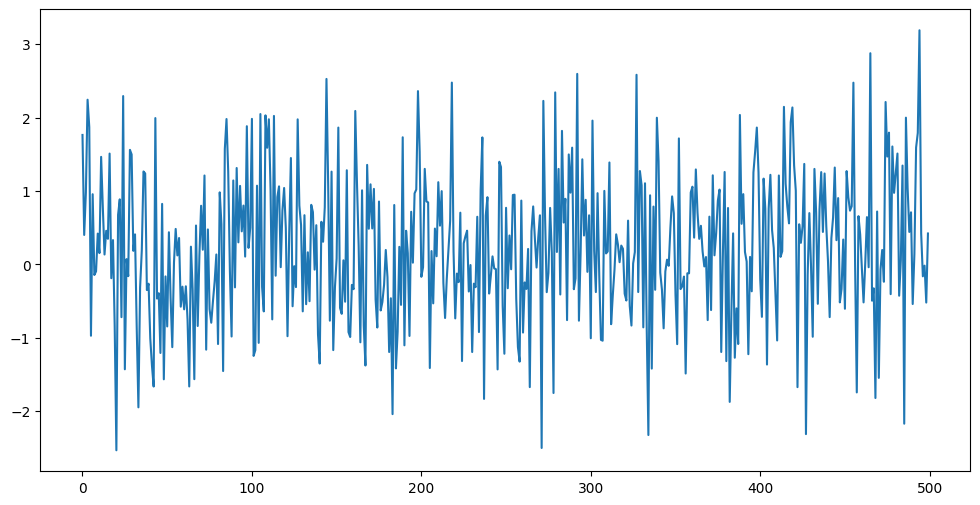

p-value (Временной ряд с трендом 0.001): 0.0
Ряд стационарен


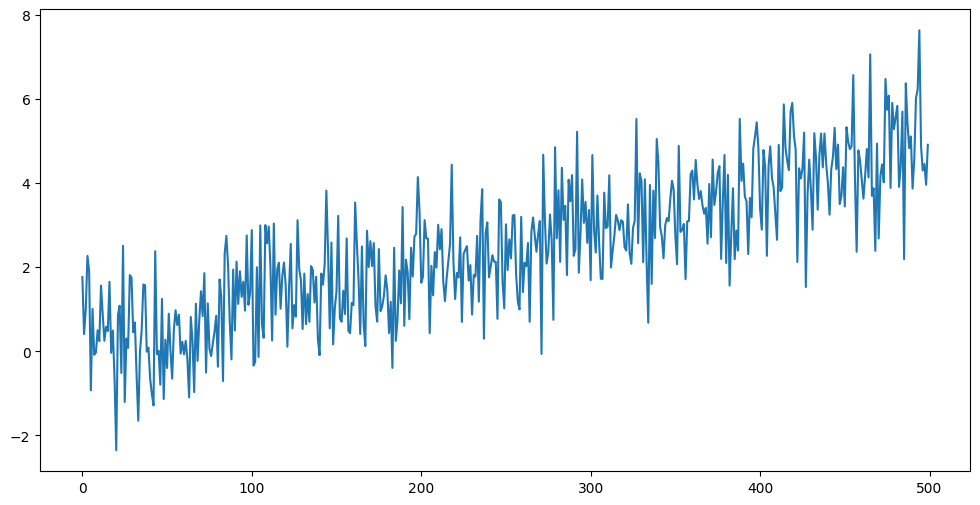

p-value (Временной ряд с трендом 0.01): 0.0
Ряд стационарен


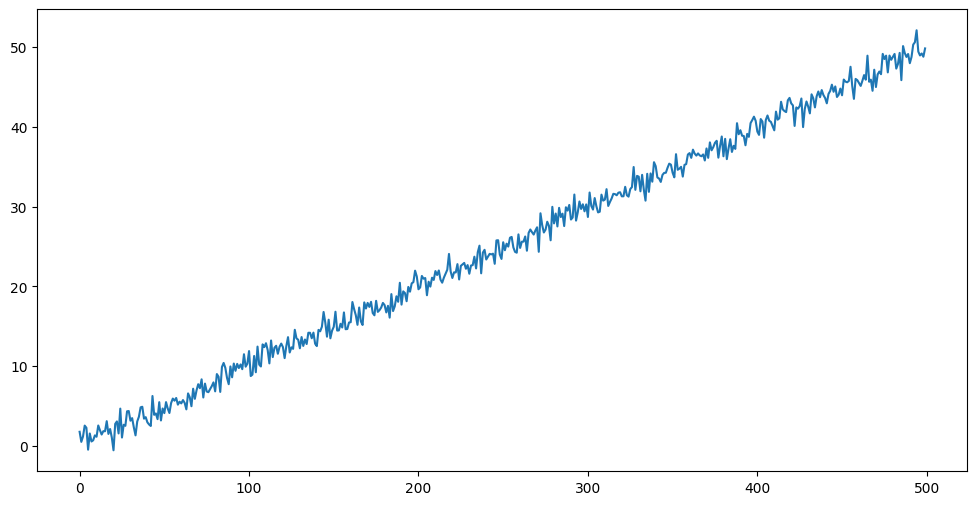

p-value (Временной ряд с трендом 0.1): 0.0
Ряд стационарен


In [8]:
for trend in trends:
    trends = gau + trend * np.arange(500)

    # Построение графика временного ряда с трендом
    plt.figure(figsize=(12, 6))
    plt.plot(trends, label=f'Временной ряд с трендом {trend}')
    plt.show()

    # Проведение теста Дики-Фуллера на временном ряду с трендом
    result = adfuller(series_with_trend, maxlag=1, regression='ct')
    p_value = result[1]
    print(f'p-value{trend}): {p_value}')
    if p_value < 0.05:
        print('Ряд стационарен')

In [13]:
data = pd.read_csv('/content/drive/MyDrive/passengers.csv')
passengers = data['#Passengers'].values

n = len(passengers)
part1 = passengers[:n//3]
part2 = passengers[n//3:2*n//3]
part3 = passengers[2*n//3:]

mean1, var1 = np.mean(part1), np.var(part1)
mean2, var2 = np.mean(part2), np.var(part2)
mean3, var3 = np.mean(part3), np.var(part3)

log_passengers = np.log(passengers)

log_part1 = log_passengers[:n//3]
log_part2 = log_passengers[n//3:2*n//3]
log_part3 = log_passengers[2*n//3:]

log_mean1, log_var1 = np.mean(log_part1), np.var(log_part1)
log_mean2, log_var2 = np.mean(log_part2), np.var(log_part2)
log_mean3, log_var3 = np.mean(log_part3), np.var(log_part3)

result = adfuller(passengers, maxlag=1, regression='ct')
p_value = result[1]
print(f'p-value: {p_value}')
if p_value < 0.05:
    print('Ряд стационарен')

p-value: 4.5434210719524845e-10
Ряд стационарен


In [14]:
result = adfuller(log_passengers, maxlag=1, regression='ct')
p_value = result[1]
print(f'p-value (логарифмированный датасет): {p_value}')
if p_value < 0.05:
    print('Ряд стационарен')


p-value (логарифмированный датасет): 1.4482752763751126e-08
Ряд стационарен
